In [7]:
import cv2 
import numpy as np
import matplotlib.pylab as plt
import imageCore

def showC(img):
    rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(rgb,cmap="gray")
    
def show(img):
    plt.imshow(img,cmap="gray")

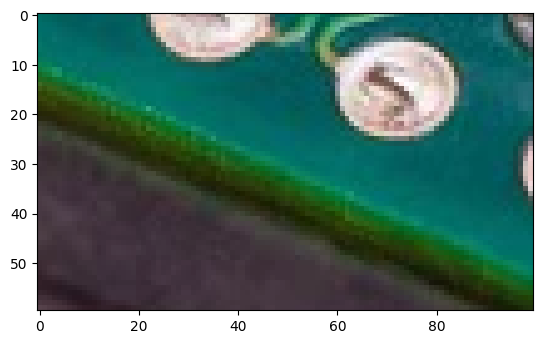

In [8]:
crop = cv2.imread("images/imgcrop.png")
template = cv2.imread("images/imgcrop.png",0 )
img  = cv2.imread("images/chip3.png")
gray  = cv2.imread("images/chip3.png",0)

showC(crop)

h_crop , w_crop = template.shape[0], template.shape[1]

# **Template Matching Algorithm**

In [16]:
res = cv2.matchTemplate(gray,template,cv2.TM_CCORR_NORMED)

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
print(max_val)

0.9999796152114868


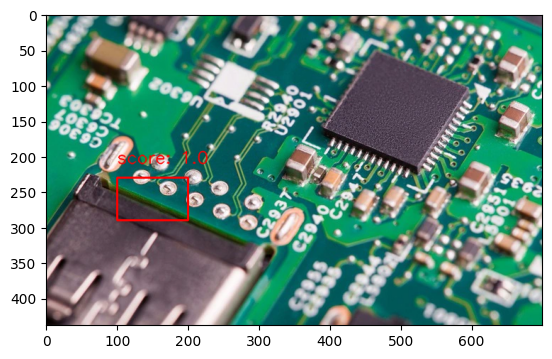

In [17]:
THRESH  = 0.95
methods = [ cv2.TM_SQDIFF_NORMED, # mode tính correlation cofficient theo squared difference
            cv2.TM_CCORR_NORMED, # mode tính correlation cofficient theo khoảng cách cosine
            cv2.TM_CCOEFF_NORMED, # mode tính correlation cofficient theo khoảng cách correlation cofficient 
           ] 
           

img_copy = img.copy()

for method in methods:

    res = cv2.matchTemplate(gray,template,method)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    """
      min_val: min score
      max_val: max score

      min_loc: toa do top_left
      max_loc: tao do bottom_right

    """
    if max_val >= THRESH:
        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
            
        bottom_right = (top_left[0] + w_crop,top_left[1] + h_crop)

        img_copy = cv2.rectangle(img_copy, top_left, bottom_right, (0,0,255), 2)

        position = (top_left[0],top_left[1] -20)
        
        img_copy = cv2.putText(img_copy, f'score: {round(max_val,2)}', position, cv2.FONT_HERSHEY_SIMPLEX,
                    0.8, (0,0,255), 1, cv2.LINE_AA)

showC(img_copy)

0.9999381303787231


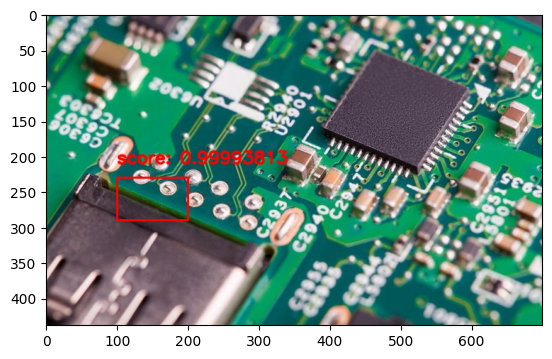

In [24]:
img_copy = img.copy()

"""cv2.TM_SQDIFF_NORMED, # mode tính correlation cofficient theo squared difference
    cv2.TM_CCORR_NORMED, # mode tính correlation cofficient theo khoảng cách cosine
    cv2.TM_CCOEFF_NORMED"""

method = cv2.TM_CCOEFF_NORMED

res = cv2.matchTemplate(gray,template,method)

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
print(max_val)
"""
    min_val: min score
    max_val: max score

    min_loc: toa do top_left
    max_loc: tao do bottom_right

"""
if max_val >= THRESH:
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
        
    bottom_right = (top_left[0] + w_crop,top_left[1] + h_crop)

    img_copy = cv2.rectangle(img_copy, top_left, bottom_right, (0,0,255), 2)

    position = (top_left[0],top_left[1] -20)
    
    img_copy = cv2.putText(img_copy, f'score: {round(max_val,8)}', position, cv2.FONT_HERSHEY_SIMPLEX,
                0.8, (0,0,255), 2, cv2.LINE_AA)
    
showC(img_copy)